# Data Loading and Preprocessing


In this section, we load the COVID-19 data for deaths and confirmed cases in the US, aggregate it by state, and then normalize the data for clustering and heatmap visualization.



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the data
deaths_data = pd.read_csv('time_series_covid19_deaths_US.csv')
confirmed_data = pd.read_csv('time_series_covid19_confirmed_US.csv')

# Aggregate data by state
state_deaths = deaths_data.groupby('Province_State').sum().iloc[:, 11:]  # Start from the first date column
state_cases = confirmed_data.groupby('Province_State').sum().iloc[:, 11:]

# Normalize the data for clustering and heatmap visualization
state_deaths_normalized = (state_deaths - state_deaths.min()) / (state_deaths.max() - state_deaths.min())
state_cases_normalized = (state_cases - state_cases.min()) / (state_cases.max() - state_cases.min())


# Hierarchical Clustering and Dendrogram Plotting


 This section performs hierarchical clustering on the normalized data for both cases and deaths, then plots dendrograms to visualize the clustering structure of the states based on the spread of COVID-19.



### Dendrogram of COVID-19 Cases and Deaths:

 The dendrogram illustrates the hierarchical clustering of states based on the similarity of COVID-19 case or death trends.

 Users can observe clusters of states that have similar patterns of COVID-19 spread over time.

 By analyzing the dendrogram, users can identify outlier states that exhibit unique trends in COVID-19 cases or deaths compared to other states.

 Understanding the clustering structure helps users recognize regions with similar levels of COVID-19 spread and potential hotspots that require closer attention.


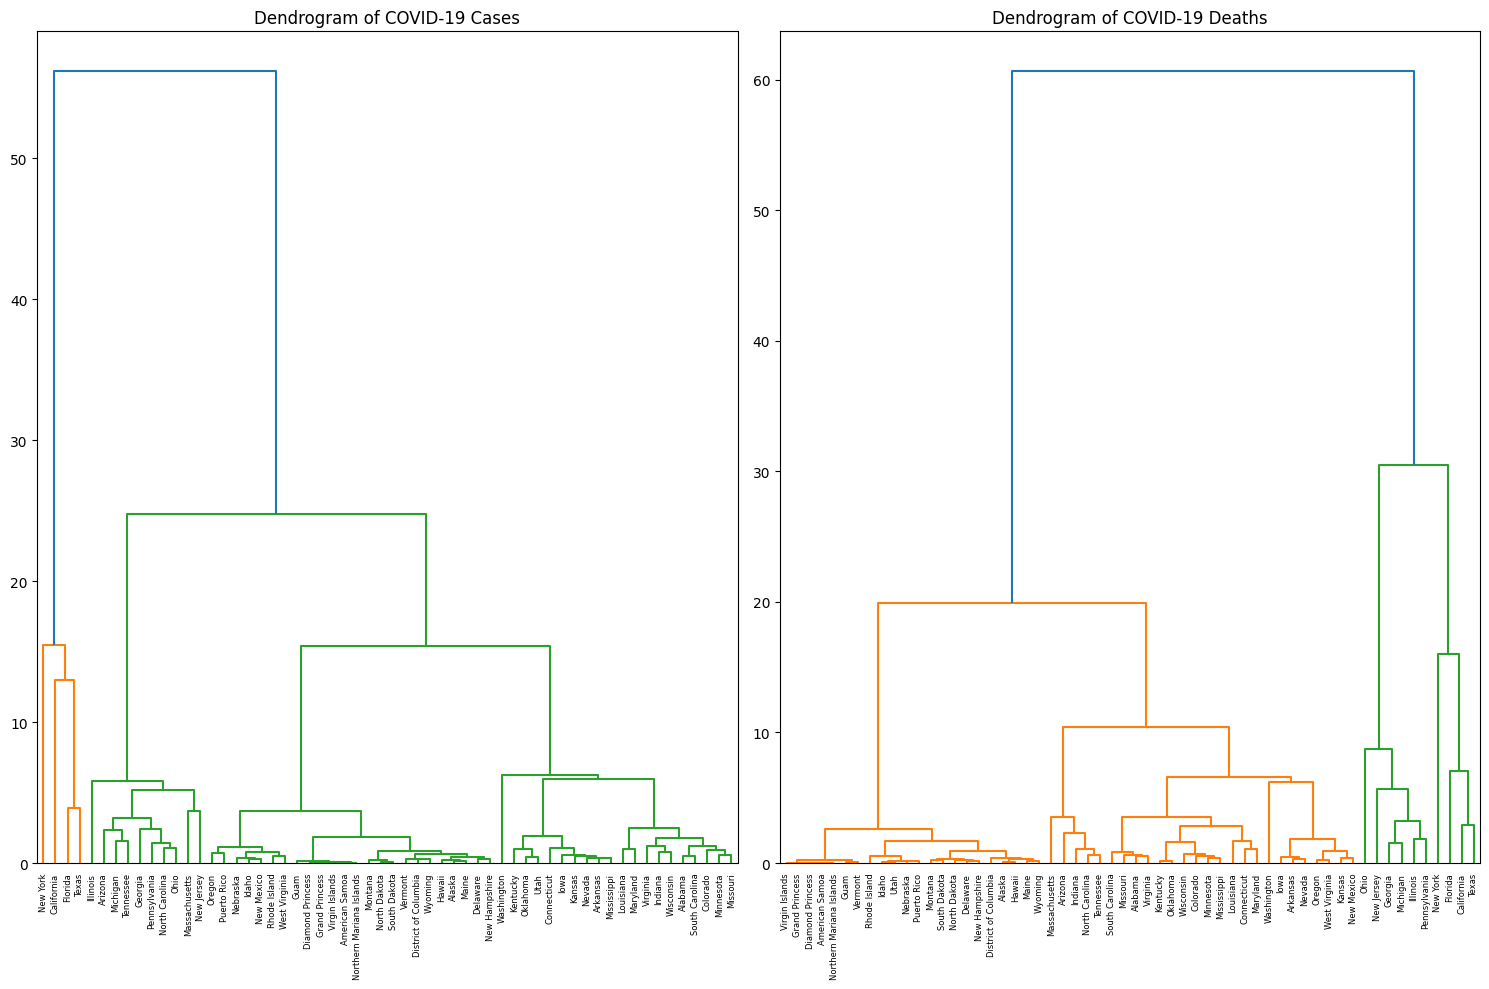

In [2]:
# Perform hierarchical clustering
linked_deaths = linkage(state_deaths_normalized, 'ward')
linked_cases = linkage(state_cases_normalized, 'ward')

# Plotting
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
dendrogram(linked_cases, labels=state_cases_normalized.index, orientation='top')
plt.title('Dendrogram of COVID-19 Cases')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
dendrogram(linked_deaths, labels=state_deaths_normalized.index, orientation='top')
plt.title('Dendrogram of COVID-19 Deaths')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


# Heatmap Visualization


This section creates heatmaps to visualize the normalized COVID-19 cases and deaths by state over time.



### Heatmap of COVID-19 Cases and Deaths by State Over Time:

Heatmaps provide a visual representation of COVID-19 cases or deaths across states and over time.

Users can observe the intensity of COVID-19 spread in each state through color gradients, where darker shades indicate higher normalized case or death counts.

Temporal trends can be identified by observing changes in color intensity over different dates.

Users can compare the heatmaps of cases and deaths to understand the correlation between the number of cases and resultant deaths in different states.

Outliers in the heatmaps may signify regions with sudden spikes or prolonged periods of high COVID-19 activity, allowing users to investigate potential factors contributing to these patterns.


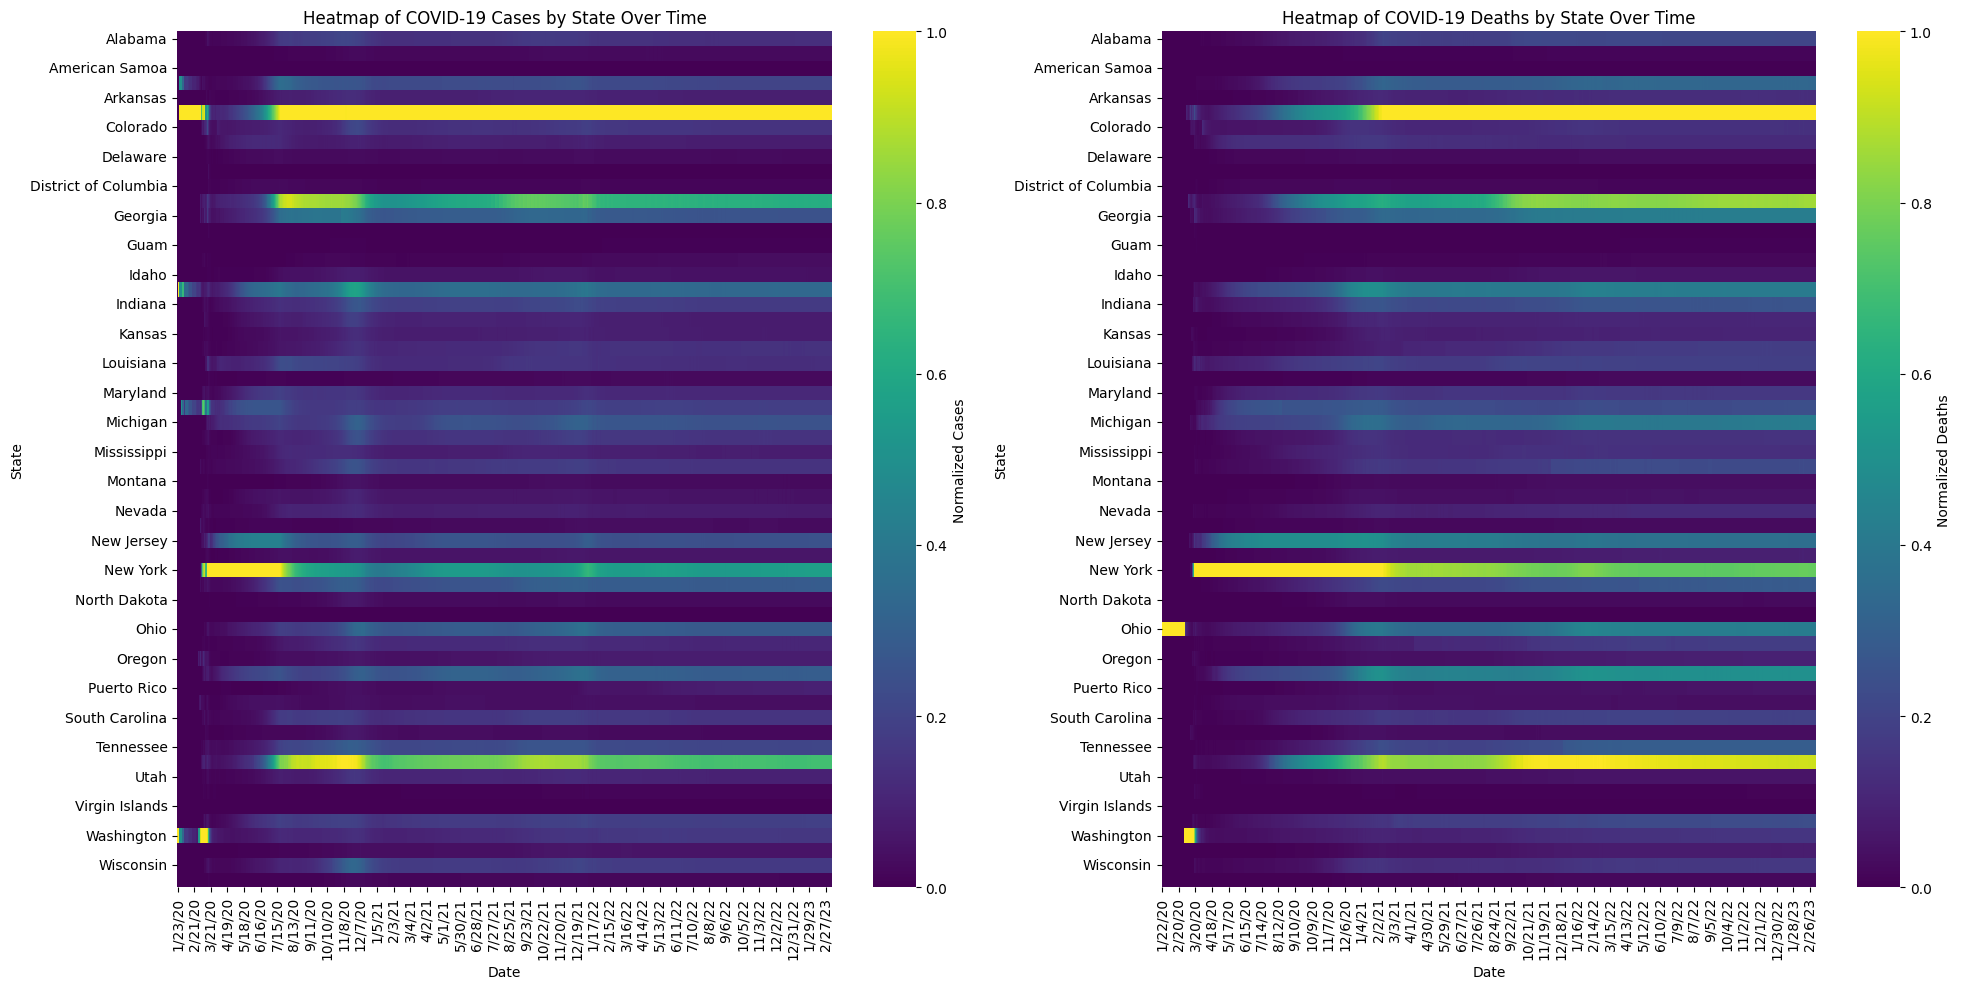

In [3]:
# Heatmaps of the normalized data
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.heatmap(state_cases_normalized, cmap='viridis', cbar_kws={'label': 'Normalized Cases'})
plt.title('Heatmap of COVID-19 Cases by State Over Time')
plt.xlabel('Date')
plt.ylabel('State')

plt.subplot(1, 2, 2)
sns.heatmap(state_deaths_normalized, cmap='viridis', cbar_kws={'label': 'Normalized Deaths'})
plt.title('Heatmap of COVID-19 Deaths by State Over Time')
plt.xlabel('Date')
plt.ylabel('State')

plt.tight_layout()
plt.show()


By combining insights from both the dendrograms and heatmaps, a we can gain comprehensive understanding of the spatial and temporal trends in COVID-19 spread across different states. These visualizations empower us to identify hotspots, monitor the effectiveness of interventions, and make informed decisions related to public health policies and resource allocation.